This notebook tests out the basic LM-fitting capabilities, and MCMC too.

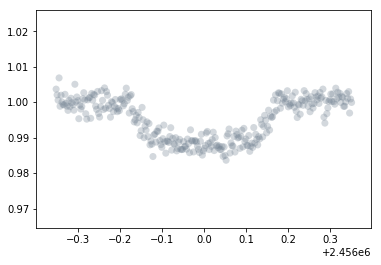

In [1]:
import numpy as np, matplotlib.pyplot as plt
%matplotlib inline

from transit.TLC import TLC
from transit.TM import TM
from transit.Planet import Planet
from transit.Star import Star
from transit.Instrument import Instrument

p = Planet()
s = Star()
i = Instrument()

bjd = np.linspace(p.t0.value - p.duration*1, p.t0.value + p.duration*1, 300)
fluxerr = 0.002*np.ones_like(bjd)
tlc = TLC(bjd, np.ones_like(bjd), fluxerr, directory='example/', telescope='Galileo', epoch=0)
#other = TLC(directory='example/', telescope='Galileo', epoch=0)


tm = TM(planet=p, star=s, instrument=i, directory='example/')
tlc.linkModel(tm)


m = tm.planet_model(t=bjd)
tlc.flux = m+np.random.normal(0, 1, len(bjd))*fluxerr
tlc.plot(alpha=0.3)

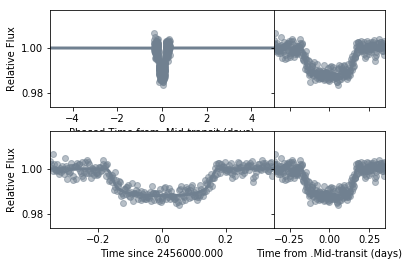

In [2]:
tlc.ready = False
tlc.LightcurvePlots()

In [3]:
tm.planet.rp_over_rs.float(0.09, [0.05, 0.15])
tm.planet.rsovera.float(0.09, [0.05, 0.2])

tm.instrument.C.float(1.001, [0.99,1.01])
tm.defineParameterList()
tm.floating

['rsovera', 'k', 'C']

           [lm] performing a fast LM fit
           [lm]     rsovera
           [lm]     k
           [lm]     C
           [tm] using atmosphere model as prior on LD coefficients
           [lm] running lmfit minimization
           [lm] acheived a chisq of 348.45/297 required a rescaling of 1.08
           [lm] identified 1 new points as bad; refitting without them
           [lm] performing a fast LM fit
           [lm]     rsovera
           [lm]     k
           [lm]     C
           [tm] using atmosphere model as prior on LD coefficients
           [lm] running lmfit minimization
           [lm] acheived a chisq of 337.23/296 required a rescaling of 1.07
          [mvg] C = $1.000108 \pm 0.000186$
          [mvg] k = $0.09939 \pm 0.00122$
          [mvg] rsovera = $0.10144 \pm 0.00111$
           [lm] saving LM fit to example/lm/
           [lm]   the PDF
          [mvg] saved PDF to example/lm/pdf.npy
           [lm]   the fitting notes
           [lm]   the best-fit model
     

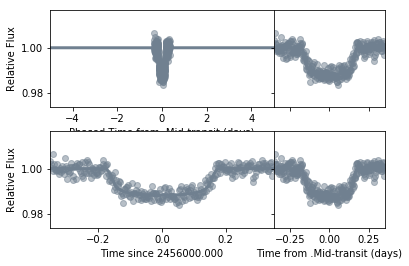

In [4]:
tm.fastfit(remake=True)
tlc.ready=False
tlc.LightcurvePlots()

/Users/zkbt/anaconda3/envs/transit/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


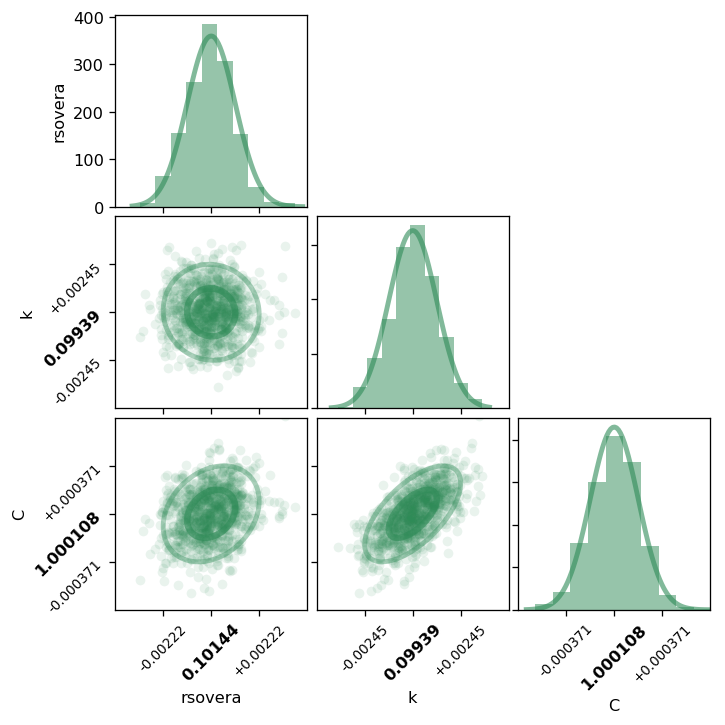

In [5]:
tm.fitter.pdf.simulateSamples(n=1000)
tm.fitter.pdf.plot(plotcovariance=True, onesigmalabels=True, nbins=10)

In [11]:
tm.planet.rp_over_rs.float(0.09, [0.05, 0.15])
tm.planet.rsovera.float(0.09, [0.05, 0.2])
tm.instrument.C.float(1.001, [0.99,1.01])
tm.slowfit(plot=False, remake=True)

  2%|▏         | 1/50 [00:00<00:08,  5.75it/s]

         [mcmc] running an MCMC fit
         [mcmc]     rsovera
         [mcmc]     k
         [mcmc]     C
         [mcmc]     rescaling
           [tm] using atmosphere model as prior on LD coefficients
         [mcmc] initializing 100 for each of the 4
         [mcmc]   rsovera picked from .uniform distribution spanning [0.05, 0.2]
         [mcmc]   k picked from .uniform distribution spanning [0.05, 0.15]
         [mcmc]   C picked from .uniform distribution spanning [0.99, 1.01]
         [mcmc]   rescaling picked from .uniform distribution spanning [0.5, 2.0]
         [mcmc] running 500 burn-in steps, with 100 walkers.
        [emcee] running MCMC, and will provide updates every 10 steps


  2%|▏         | 1/50 [00:00<00:08,  5.95it/s]

         [mcmc] running for inference, using 500 steps and 100 walkers
        [emcee] running MCMC, and will provide updates every 10 steps


100%|██████████| 50/50 [00:08<00:00,  5.92it/s]


      [sampled] C = $1.000105 \pm 0.000173$
      [sampled] k = $0.09941 \pm 0.0011$
      [sampled] rescaling = $1.072 \pm 0.045$
      [sampled] rsovera = $0.10141 \pm 0.00117$
         [mcmc] saving LM fit to example/mcmc/
         [mcmc]   the PDF
      [sampled] saved PDF to example/mcmc/pdf.npy
         [mcmc]   the fitting notes
         [mcmc]   the best-fit model
       [planet] saved to example/mcmc/Planet.npy
         [star] saved to example/mcmc/Star.npy
   [instrument] saved to example/mcmc/Instrument.npy


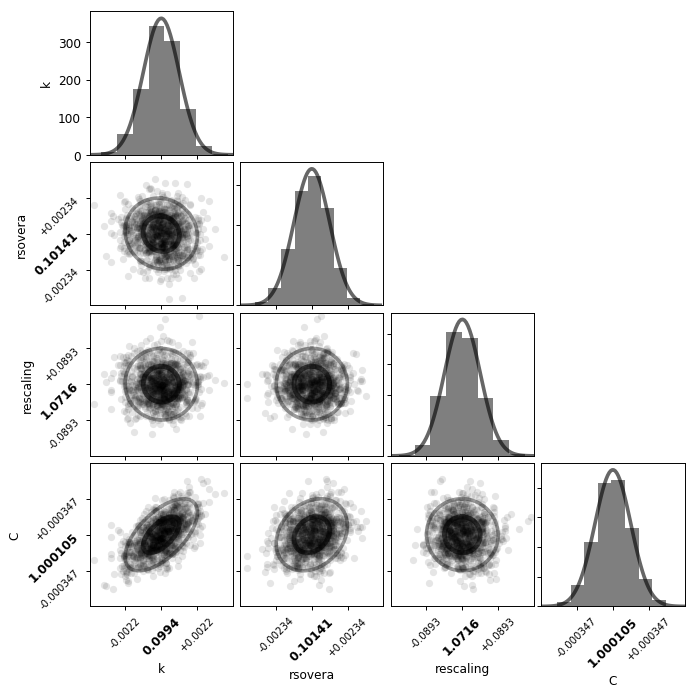

In [13]:
tm.fitter.pdf.plot(plotcovariance=True, onesigmalabels=True, nbins=10, subsample=1000)

In [14]:
tm.fitter.pdf.printParameters()

      [sampled] C = $1.000105 \pm 0.000173$
      [sampled] k = $0.09941 \pm 0.0011$
      [sampled] rescaling = $1.072 \pm 0.045$
      [sampled] rsovera = $0.10141 \pm 0.00117$
